In [1]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
bank_data = pd.read_csv('bank-full.csv')
bank_data.head(n=10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [5]:
bank_data.shape

(45211, 17)

In [6]:
# Preprocessing Data
# map our ‘default’ and 'Target' column, which contains no and yes, to 0s and 1s, respectively.
bank_data['default'] = bank_data['default'].map({'no':0,'yes':1,'unknown':0})
bank_data['housing'] = bank_data['housing'].map({'no':0,'yes':1,'unknown':0})
bank_data['loan'] = bank_data['loan'].map({'no':0,'yes':1,'unknown':0})
bank_data['marital'] = bank_data['marital'].map({'single':0,'married':1,'divorced':0})
bank_data['Target'] = bank_data['Target'].map({'no':0,'yes':1})

In [7]:
# select numerical columns
bank_data_numeric = bank_data.select_dtypes(include=[np.number])
numeric_cols = bank_data_numeric.columns.values

In [8]:
numeric_cols

array(['age', 'marital', 'default', 'balance', 'housing', 'loan', 'day',
       'duration', 'campaign', 'pdays', 'previous', 'Target'],
      dtype=object)

In [9]:
# select non-numeric categorical columns
bank_data_non_numeric = bank_data.select_dtypes(exclude=[np.number])
non_numeric_cols = bank_data_non_numeric.columns.values

In [10]:
non_numeric_cols

array(['job', 'education', 'contact', 'month', 'poutcome'], dtype=object)

In [11]:
# drop unwanted categorical columns
bank_data = bank_data.drop('job', axis=1)

In [12]:
bank_data = bank_data.drop('education', axis=1)
bank_data = bank_data.drop('contact', axis=1)
bank_data = bank_data.drop('month', axis=1)
bank_data = bank_data.drop('poutcome', axis=1)
bank_data = bank_data.drop('day', axis=1)

In [13]:
# Split the data into features (X) and target (y)
X = bank_data.drop('Target', axis=1)
y = bank_data['Target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
# Fitting and Evaluating the Model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [15]:
y_pred = rf.predict(X_test)

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8903018909653876


In [19]:
#check generated tree
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=20,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

Output hidden; open in https://colab.research.google.com to view.

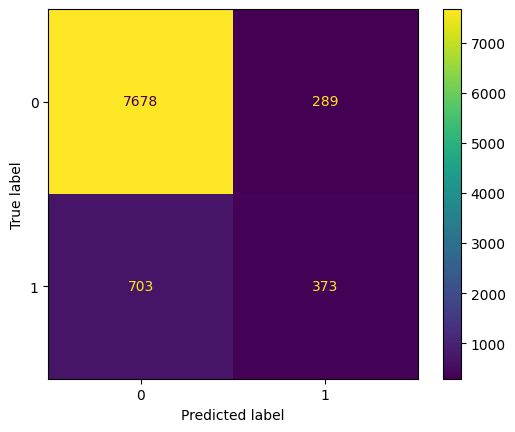

In [20]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [21]:
from sklearn.metrics import classification_report

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7967
           1       0.56      0.35      0.43      1076

    accuracy                           0.89      9043
   macro avg       0.74      0.66      0.68      9043
weighted avg       0.87      0.89      0.88      9043



In [24]:
from sklearn .metrics import roc_auc_score

In [25]:
auc = np.round(roc_auc_score(y_test, y_pred), 3)
print("Auc for our sample data is {}".format(auc))

Auc for our sample data is 0.655


Finding the best parmeters for n estimators and max depth of tree

In [26]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf1 = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf1,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f06b370ff10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f0676ab4d90>})

In [27]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 10, 'n_estimators': 436}


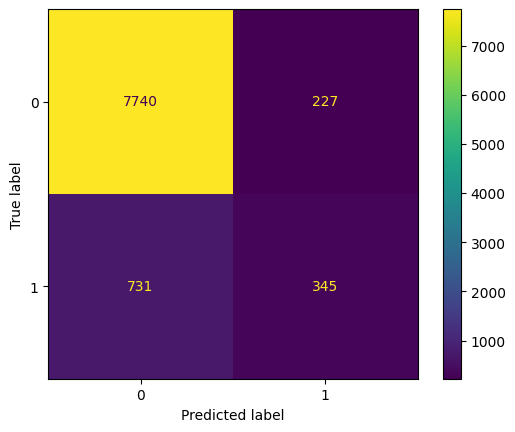

In [28]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7967
           1       0.60      0.32      0.42      1076

    accuracy                           0.89      9043
   macro avg       0.76      0.65      0.68      9043
weighted avg       0.88      0.89      0.88      9043



In [30]:
auc = np.round(roc_auc_score(y_test, y_pred), 3)
print("Auc for our sample data is {}".format(auc))

Auc for our sample data is 0.646
